Sascha Spors,
Professorship Signal Theory and Digital Signal Processing,
Institute of Communications Engineering (INT),
Faculty of Computer Science and Electrical Engineering (IEF),
University of Rostock, Germany

Tutorial Digital Signal Processing (Course #24505),
**Random Signals, Ensemble & Temporal Averages**,
Winter Semester 2019/20

Feel free to contact lecturer frank.schultz@uni-rostock.de

- lecture: https://github.com/spatialaudio/digital-signal-processing-lecture
- tutorial: https://github.com/spatialaudio/digital-signal-processing-exercises

WIP...

In [1]:
# most common used packages for DSP, have a look into other scipy submodules
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import signal
#from scipy import fftpack
from scipy import stats


def my_xcorr(x, y):
    N = len(x)
    M = len(y)
    kappa = np.arange(0, N+M-1) - (M-1)
    #ccf = np.correlate(x, y, mode='full')
    ccf = signal.correlate(x, y, mode='full', method='auto')
    return kappa, ccf

In [2]:
if False:  # test my_xcorr
    plt.figure(figsize=(4, 2))
    x = np.array([0, 1, 0, 0, 0])
    y = np.array([1, 0, 0])
    kappa, ccf = my_xcorr(x, y)
    plt.stem(kappa, ccf, basefmt='C0:')
    plt.xlabel(r'$\kappa$')
    plt.ylabel(r'$\phi_{xy}[\kappa]$')
    plt.title('cross correlation CCF(x,y)')
    plt.grid(True)

# First-Order Ensemble Averages

For a probability density function (PDF) $p_x(\theta, k)$ that describes a random process of 'drawing' signal amplitudes $\theta$ for $n$-th sample function $x_n[k]$ over time $k$, we can define the following **expectation**

\begin{equation}
\begin{split}
E\{ f(x[k]) \} = \int\limits_{-\infty}^{\infty} f(\theta) \, p_x(\theta, k) \, \mathrm{d}\theta\\
E\{ f(x[k]) \} = \lim_{N \to \infty} \frac{1}{N} \sum_{n=0}^{N-1} f(x_n[k])
\end{split}
\end{equation}

using the operator or **mapping function** $f(\cdot)$.

Most important are the following **first-order** ensemble averages, also called **univariate** moments, named since **one** random process is involved.

#### Linear mean / 1st raw moment

for $f(\theta)=\theta^1$

\begin{equation}
\begin{split}
\mu_x[k] = E\{ x[k] \} = \int\limits_{-\infty}^{\infty} \theta \, p_x(\theta, k) \, \mathrm{d}\theta\\
\mu_x[k] = E\{ x[k] \} = \lim_{N \to \infty} \frac{1}{N} \sum_{n=0}^{N-1} x_n[k]
\end{split}
\end{equation}

#### Quadratic mean / 2nd raw moment

for $f(\theta)=\theta^2$

\begin{equation}
\begin{split}
E\{ x^2[k] \} = \int\limits_{-\infty}^{\infty} \theta^2 \, p_x(\theta, k) \, \mathrm{d}\theta\\
E\{ x^2[k] \} = \lim_{N \to \infty} \frac{1}{N} \sum_{n=0}^{N-1} x_n^2[k]
\end{split}
\end{equation}

#### Variance / 2nd centralized moment

for $f(\theta) = (\theta - \mu_x[k])^2$

\begin{equation}
\begin{split}
\sigma_x^2[k] = E\{ (x[k] - \mu_x[k])^2 \} = \int\limits_{-\infty}^{\infty} (\theta - \mu_x[k])^2 \, p_x(\theta, k) \, \mathrm{d}\theta\\
\sigma_x^2[k] = E\{ (x[k] - \mu_x[k])^2 \} = \lim_{N \to \infty} \frac{1}{N} \sum_{n=0}^{N-1} (x_n[k] - \mu_x[k])^2
\end{split}
\end{equation}

These three moments are generally linked as
\begin{equation}
E\{ x^2[k] \} = \mu_x^2[k] + \sigma_x^2[k].
\end{equation}

For **stationary processes** these ensemble averages are not longer time-dependent, but rather $\mu_x[k] = \mu_x = \mathrm{const}$, etc. holds.
This implies that the PDF is not changing over time.

# Second-Order Ensemble Averages

The **second-order** ensemble averages, also called **bivariate** moments (**two** random processes are involved) can be derived from

\begin{equation}
E\{ f(x[k_x], y[k_y]) \} = \iint\limits_{-\infty}^{\infty} f(\theta_x, \theta_y) \, p_{xy}(\theta_x, \theta_y, k_x, k_y) \, \mathrm{d}\theta_x\, \mathrm{d}\theta_y
\end{equation}

\begin{equation}
E\{ f(x[k_x], y[k_y]) \} = \lim_{N \to \infty} \frac{1}{N} \sum_{n=0}^{N-1} f(x_n[k_x], y_n[k_y])
\end{equation}

using appropriate **mapping functions** $f(\cdot)$.

For **stationary processes** only the difference $\kappa = k_x - k_y$ is relevant as bivariate PDF
\begin{equation}
p_{xy}(\theta_x, \theta_y, k_x, k_y) = p_{xy}(\theta_x, \theta_y, \kappa).
\end{equation}

For **stationary processes** two important cases lead to fundamental tools for random signal processing:

1. $\kappa = 0$, i.e. $k = k_x = k_y$
2. $\kappa \neq 0$

## Case 1

The general linear mappings

\begin{equation}
\begin{split}
\text{for raw (1,1)-bivariate moment:} \qquad & f(\theta_x, \theta_y)=\theta_x^1 \cdot \theta_y^1,\\
\text{for centralized (1,1)-bivariate moment:} \qquad & f(\theta_x, \theta_y) = (\theta_x - \mu_x[k_x])^1 \cdot (\theta_y - \mu_y[k_y])^1\\
\text{for standardized (1,1)-bivariate moment:} \qquad & f(\theta_x, \theta_y) = \left(\frac{\theta_x - \mu_x[k_x]}{\sigma_x[k_x]}\right)^1 \cdot \left(\frac{\theta_y - \mu_y[k_y]}{\sigma_y[k_y]}\right)^1.
\end{split}
\end{equation}

simplify under the assumption of stationary processes and considering $\kappa=0$, i.e. $k = k_x = k_y$.
The resulting expectations $E\{\cdot\}$ are

- the raw (1,1)-bivariate moment, known as cross-power $\mathrm{P}_{xy}$
- the centralized (1,1)-bivariate moment, known as co-variance $\sigma_{xy}$
- the standardized (1,1)-bivariate moment, known as correlation coefficient $\rho_{xy}$

## Case 2

For $\kappa = k_x - k_y \neq 0$ the raw and centralized moments are of special importance:

\begin{equation}
\begin{split}
\mathrm{raw:}\qquad&\varphi_{xy}[k_x, k_y] = \varphi_{xy}[\kappa] = E\{ x[k] \cdot y[k-\kappa]\} = E\{ x[k+\kappa] \cdot y[k]\}\\
\mathrm{centralized:}\qquad&\psi_{xy}[\kappa] = \varphi_{xy}[\kappa] - \mu_x \mu_y
\end{split}
\end{equation}

The raw moment is known as **cross-correlation** function $\varphi_{xy}[\kappa]$, the centralized moment is known as **cross-covariance** function $\psi_{xy}[\kappa]$.

If for the second process $y$ the process $x$ is considered as

\begin{equation}
\begin{split}
\mathrm{raw:}\qquad&\varphi_{xx}[\kappa] = E\{ x[k] \cdot x[k-\kappa]\} = E\{ x[k+\kappa] \cdot x[k]\}\\
\mathrm{centralized:}\qquad&\psi_{xx}[\kappa] = \varphi_{xx}[\kappa] - \mu^2_x
\end{split}
\end{equation}
the so called **auto-correlation** function $\varphi_{xx}[\kappa]$ and **auto-covariance** function $\psi_{xx}[\kappa]$ are obtained.

The auto- and cross-correlation functions are of fundamental importance for random signal processing, as these are linked to LTI systems.

# Ergodic Processes

Averaging over time is equal to ensemble averages:

\begin{equation}
\overline{ f(x_n[k], x_n[k-\kappa_1], x_n[k-\kappa_2], \dots) } = E\{  f(x[k], x[k-\kappa_1], x[k-\kappa_2], \dots)  \} \;\; \forall n.
\end{equation}

## Wide-Sense Ergodic

\begin{equation}
\overline{ x_n[k] \cdot x_n[k-\kappa] } = E\{  x[k] \cdot x[k-\kappa]  \} \;\; \forall n
\end{equation}

\begin{equation}
\overline{ x_n[k] } = E\{  x[k] \} \;\; \forall n.
\end{equation}

## Important Temporal Averages

The linear mean as temporal average of the $n$-th sample function $x_n[k]$ is for instance given by

\begin{equation}
\overline{x_n[k]} = \lim_{K \to \infty} \frac{1}{2K + 1} \sum_{k = -K}^{K} x_n[k].
\end{equation}

Furthermore, the quadratic mean from simple quadratic mapping is given as
\begin{equation}
\lim_{K \to \infty} \frac{1}{2K + 1} \sum_{k = -K}^{K} x^2_n[k],
\end{equation}

the variance is given as
\begin{equation}
\lim_{K \to \infty} \frac{1}{2K + 1} \sum_{k = -K}^{K} (x_n[k]-\overline{x_n[k]})^2,
\end{equation}

the cross-correlation as
\begin{equation}
\lim_{K \to \infty} \frac{1}{2K + 1} \sum_{k=-K}^{K} x[k] \cdot y[k-\kappa],
\end{equation}

and the auto- correlation as
\begin{equation}
\lim_{K \to \infty} \frac{1}{2K + 1} \sum_{k=-K}^{K} x[k] \cdot x[k-\kappa].
\end{equation}

These equations hold for power signals. Virtually all random signals are power signals rather than energy signals. 


# Example: Histogram as PDF Estimate, First-Order Ensemble Averages

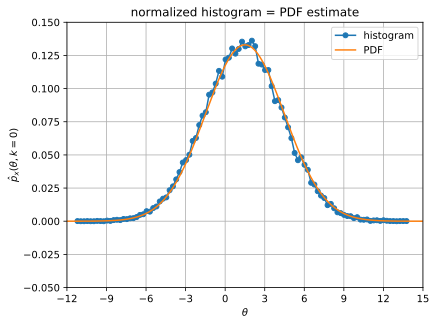

In [3]:
# create random process based on normal distribution
Ns = 2**15  # number of sample function
Nt = 1  # number of time steps per sample function
np.random.seed(1)

loc, scale = 3/2, 3  # mu, sigma

# create and plot normalized histogram:
x = np.random.normal(loc=loc, scale=scale, size=[Ns, Nt])
pdf, edges = np.histogram(x[:, 0], bins='auto', density=True)
plt.plot(edges[:-1], pdf, 'o-', ms=5, label='histogram')

# plot gaussian PDF:
theta = np.arange(-12, 15, 0.05)
plt.plot(theta, stats.norm.pdf(theta, loc=loc, scale=scale), label='PDF')

plt.xlabel(r'$\theta$')
plt.ylabel(r'$\hat{p}_x(\theta,k=0)$')
plt.title('normalized histogram = PDF estimate')
plt.xlim(-12, 15)
plt.ylim(-0.05, 0.15)
plt.xticks(np.arange(-12, 18, 3))
plt.legend()
plt.grid(True)

In [4]:
# ensemble averages by numeric integration
# over histogram as a simple pdf estimate:
theta_num = edges[:-1]
dtheta = np.diff(edges)
mu = np.sum(theta_num * pdf * dtheta)  # mu estimate
qm = np.sum(theta_num**2 * pdf * dtheta)  # quadratic mean estimate
sig2 = np.sum((theta_num-mu)**2 * pdf * dtheta)  # sigma^2 estimate
print('intended ensemble average: mu = %5.3f, mu^2 = %5.3f, sigma^2 = %5.3f, mu^2 + sigma^2 = %5.3f' %
      (loc, loc**2, scale**2, loc**2+scale**2))
print(' numeric ensemble average: mu = %5.3f, mu^2 = %5.3f, sigma^2 = %5.3f, mu^2 + sigma^2 = %5.3f' %
      (mu, mu**2, sig2, qm))

intended ensemble average: mu = 1.500, mu^2 = 2.250, sigma^2 = 9.000, mu^2 + sigma^2 = 11.250
 numeric ensemble average: mu = 1.381, mu^2 = 1.908, sigma^2 = 8.993, mu^2 + sigma^2 = 10.902


# Example: Histogram of Gaussian Noise, Cosine and Rectangular Signal

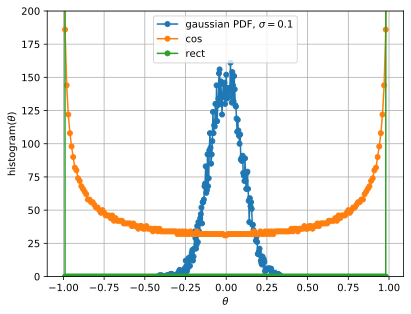

In [5]:
Ns = 10000  # number of sample function
Nt = 1  # number of time steps per sample function

# normal pdf
x = np.random.normal(loc=0, scale=0.1, size=[Ns, 1])
pdf, edges = np.histogram(x[:, 0], bins=200, density=False)
plt.plot(edges[:-1], pdf, 'o-', ms=5, label=r'gaussian PDF, $\sigma=0.1$')

# cosine signal
x = np.cos(1 * 2*np.pi/Ns*np.arange(0, Ns))
pdf, edges = np.histogram(x, bins=200, density=False)
plt.plot(edges[:-1], pdf, 'o-', ms=5, label='cos')

# rect signal
x = np.cos(1 * 2*np.pi/Ns*np.arange(0, Ns))
x[x > 0] = +1
x[x < 0] = -1
pdf, edges = np.histogram(x, bins=200, density=False)
plt.plot(edges[:-1], pdf, 'o-', ms=5, label='rect')

plt.ylim(0, 200)
plt.xlabel(r'$\theta$')
plt.ylabel(r'histogram($\theta$)')
plt.legend()
plt.grid(True)

#  Example: Higher-Order Ensemble Averages

In [6]:
# create two random processes based on normal distribution
Ns = 2**10  # number of sample functions at certain time instant k
Nt = 1  # number of time steps per sample function
np.random.seed(1)

# 1st process:
loc, scale = 1, 3
x = np.random.normal(loc=loc, scale=scale, size=[Ns, Nt])

# 2nd process:
loc, scale = 2, 4
y = np.random.normal(loc=loc, scale=scale, size=[Ns, Nt])

In [7]:
crosspower = np.mean(x * y)
covariance = np.mean((x-np.mean(x)) * (y-np.mean(y)))
rho = np.mean((x-np.mean(x))/np.std(x) * (y-np.mean(y))/np.std(y))
print('crosspower = %4.3f, covariance = %4.3f,  correlation coefficient rho = %4.3f' %
      (crosspower, covariance, rho))

crosspower = 2.048, covariance = -0.256,  correlation coefficient rho = -0.021


# Ensemble Average vs. Temporal Average

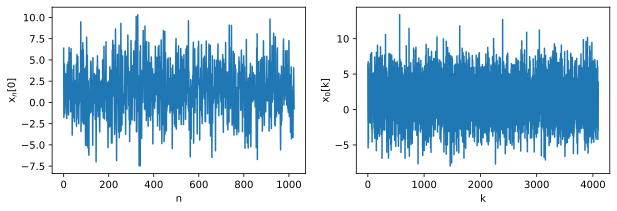

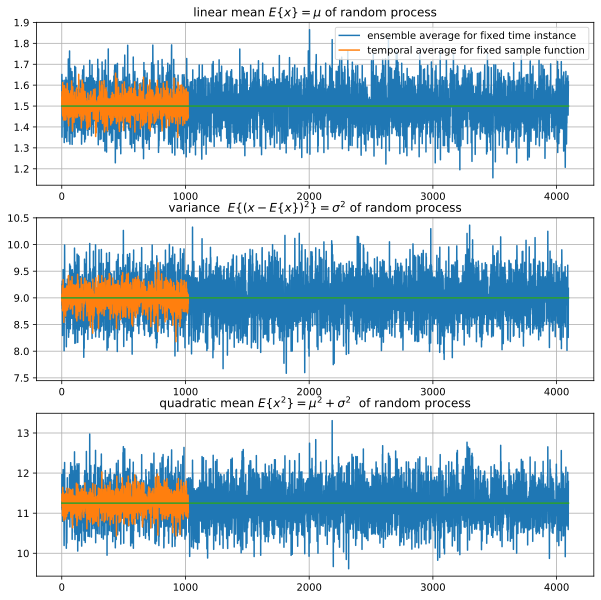

In [8]:
# create random process based on normal distribution
Ns = 2**10  # number of sample function
Nt = 2**12  # number of time steps per sample function
np.random.seed(1)

loc, scale = 3/2, 3  # mu, sigma
x = np.random.normal(loc=loc, scale=scale, size=[Ns, Nt])

plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
plt.plot(x[:, 0])
plt.xlabel('n')
plt.ylabel(r'x$_n$[0]')

plt.subplot(1, 2, 2)
plt.plot(x[0, :])
plt.xlabel('k')
plt.ylabel(r'x$_0$[k]')

if False:  # add cosine over sample functions, fixed time
    tmp = 2*np.cos(2 * 2*np.pi/Ns * np.arange(0, Ns)) + 2
    x = x + np.transpose(np.tile(tmp, (Nt, 1)))
    plt.subplot(1, 2, 1)
    plt.plot(x[:, 0])
    plt.xlabel('n')
    plt.ylabel(r'x$_n$[0]')
    plt.title('cosine modulation on sample function entries at k=0')
elif False:  # add cosine over time, fixed sample function
    tmp = 2*np.cos(2 * 2*np.pi/Nt * np.arange(0, Nt)) + 2
    x = x + np.tile(tmp, (Ns, 1))
    plt.subplot(1, 2, 2)
    plt.plot(x[0, :])
    plt.xlabel('k')
    plt.ylabel(r'x$_0$[k]')
    plt.title('sample function over time, example with cosine modulation')

plt.figure(figsize=(10, 10))
plt.subplot(3, 1, 1)
plt.plot(np.mean(x, axis=0), label=r'ensemble average for fixed time instance')
plt.plot(np.mean(x, axis=1), label='temporal average for fixed sample function')
plt.plot([0, Nt], [loc, loc])
plt.legend()
plt.title(r'linear mean $E\{x\} = \mu$ of random process')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(np.var(x, axis=0))
plt.plot(np.var(x, axis=1))
plt.plot([0, Nt], [scale**2, scale**2])
plt.title('variance  $E\{(x -E\{x\} )^2\} = \sigma^2$ of random process')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(np.mean(x**2, axis=0))
plt.plot(np.mean(x**2, axis=1))
plt.plot([0, Nt], [loc**2+scale**2, loc**2+scale**2])
plt.title('quadratic mean $E\{x^2\} = \mu^2+\sigma^2$  of random process')
plt.grid(True)

# Higher-Order Temporal Averages

In [9]:
# create two random processes based on normal distribution
Ns = 1  # number of sample functions at certain time instant k
Nt = 2**7  # number of time steps per sample function
np.random.seed(1)

# 1st process:
loc, scale = 1, 3
x = np.random.normal(loc=loc, scale=scale, size=[Ns, Nt])

# 2nd process:
loc, scale = 2, 4
y = np.random.normal(loc=loc, scale=scale, size=[Ns, Nt])

## Auto-Correlation Function

/Users/fs446/anaconda3/envs/mypy/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.
/Users/fs446/anaconda3/envs/mypy/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # Remove the CWD from sys.path while we load stuff.


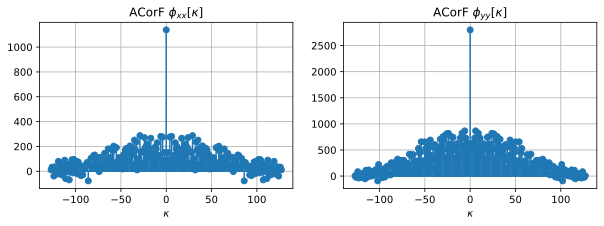

In [10]:
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
kappa, ccf = my_xcorr(x[0, :], x[0, :])
plt.stem(kappa, ccf, basefmt='C0:')
plt.xlabel(r'$\kappa$')
plt.title(r'ACorF $\phi_{xx}[\kappa]$')
plt.grid(True)
plt.subplot(1, 2, 2)
kappa, ccf = my_xcorr(y[0, :], y[0, :])
plt.stem(kappa, ccf, basefmt='C0:')
plt.xlabel(r'$\kappa$')
plt.title(r'ACorF $\phi_{yy}[\kappa]$')
plt.grid(True)

## Cross-Correlation Function

/Users/fs446/anaconda3/envs/mypy/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.
/Users/fs446/anaconda3/envs/mypy/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # Remove the CWD from sys.path while we load stuff.


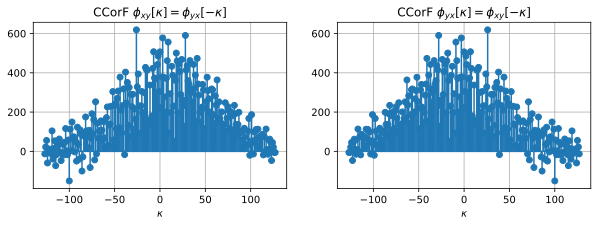

In [11]:
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
kappa, ccf = my_xcorr(x[0, :], y[0, :])
plt.stem(kappa, ccf, basefmt='C0:')
plt.xlabel(r'$\kappa$')
plt.title(r'CCorF $\phi_{xy}[\kappa]=\phi_{yx}[-\kappa]$')
plt.grid(True)
plt.subplot(1, 2, 2)
kappa, ccf = my_xcorr(y[0, :], x[0, :])
plt.stem(kappa, ccf, basefmt='C0:')
plt.xlabel(r'$\kappa$')
plt.title(r'CCorF $\phi_{yx}[\kappa]=\phi_{xy}[-\kappa]$')
plt.grid(True)

##  Auto-Covariance Function

/Users/fs446/anaconda3/envs/mypy/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.
/Users/fs446/anaconda3/envs/mypy/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # Remove the CWD from sys.path while we load stuff.


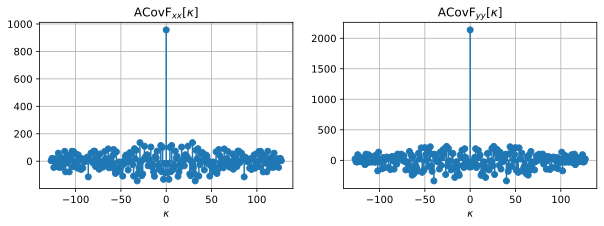

In [12]:
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
kappa, ccf = my_xcorr(x[0, :]-np.mean(x[0, :]), x[0, :]-np.mean(x[0, :]))
plt.stem(kappa, ccf, basefmt='C0:')
plt.xlabel(r'$\kappa$')
plt.title(r'ACovF$_{xx}[\kappa]$')
plt.grid(True)
plt.subplot(1, 2, 2)
kappa, ccf = my_xcorr(y[0, :]-np.mean(y[0, :]), y[0, :]-np.mean(y[0, :]))
plt.stem(kappa, ccf, basefmt='C0:')
plt.xlabel(r'$\kappa$')
plt.title(r'ACovF$_{yy}[\kappa]$')
plt.grid(True)

## Cross-Covariance Function

/Users/fs446/anaconda3/envs/mypy/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.
/Users/fs446/anaconda3/envs/mypy/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # Remove the CWD from sys.path while we load stuff.


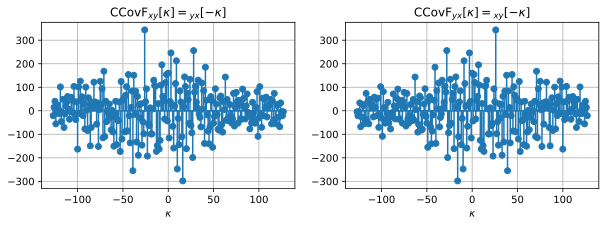

In [13]:
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
kappa, ccf = my_xcorr(x[0, :]-np.mean(x[0, :]), y[0, :]-np.mean(y[0, :]))
plt.stem(kappa, ccf, basefmt='C0:')
plt.xlabel(r'$\kappa$')
plt.title(r'CCovF$_{xy}[\kappa]=_{yx}[-\kappa]$')
plt.grid(True)
plt.subplot(1, 2, 2)
kappa, ccf = my_xcorr(y[0, :]-np.mean(y[0, :]), x[0, :]-np.mean(x[0, :]))
plt.stem(kappa, ccf, basefmt='C0:')
plt.xlabel(r'$\kappa$')
plt.title(r'CCovF$_{yx}[\kappa]=_{xy}[-\kappa]$')
plt.grid(True)

# **Copyright**

The notebooks are provided as [Open Educational Resources](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use the notebooks for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Frank Schultz, Digital Signal Processing - A Tutorial Featuring Computational Examples* with the URL https://github.com/spatialaudio/digital-signal-processing-exercises